# Domain- Medical

# Introduction:
Stroke is a severe cerebrovascular disease caused by an interruption of blood flow from and to
the brain. As a direct consequence of this interruption, the brain is not able to receive oxygen
and nutrients for its correct functioning. The other way around, the brain is not able to drain and
expel through blood vessels all of its waste, like dead cells. In a question of minutes, the brain is
in a critical condition as brain cells will imminently begin to die.
The American Stroke Association indicates that stroke is the fifth cause of death and disability in
the United States. For this reason, stroke is considered a severe disease and has been the
subject of extensive research, not only in the medical field but also in data science and machine
learning studies.

# Dataset Description :
The dataset used in this article contains 5110 records of patients. Each patient has 12 columns
each referring to a concrete attribute. Most of these attributes correspond to medical records or
the results of clinical trials. Some of the key attributes are hypertension, heart diseases, average
glucose levels in the blood, and body mass index (BMI). As we can observe from these first
attributes, the dataset provides relevant data regarding the likelihood of patients suffering from
stroke disease. It is easy to understand that a patient with high glucose levels and BMI, who has
suffered from heart diseases and/or hypertension, is more likely to suffer from stroke. In fact,
stroke is also an attribute in the dataset and indicates in each medical record if the patient
suffered from a stroke disease or not.

# Data Dictionary -
1. Id - Unique Id
2. gender
3. age
4. hypertension - Binary Feature
5. Heart_disease - Binary Feature
6. Ever_married - Has the patient ever been married
7. Work_type - Work type of a patient
8. Residency_type - Residency type of patient
9. avg_glucose_level - Average Glucose level in the blood
10. bmi - Body mass Index
11. smoking_status - Smoking status of the patient
12. stroke - stroke event


## Imports and Configurations

In [203]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# Plotly library
import plotly.express as px

# import warnings
from warnings import filterwarnings
filterwarnings('ignore')

# import train_test_split
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score,  recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve,average_precision_score

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier

In [2]:
plt.rcParams['figure.figsize'] =(8,5) 

## Q1. Read the dataset and view the first 10 rows of it.

In [204]:
# importing the csv file
df = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [205]:
# Looking at the first five records.
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## Q2. Check the shape/dimension of the dataset

In [206]:
df.shape

(5110, 12)

**The dataset contains 5110 records of patients. Each patient has 12 columns each referring to a concrete attribute.**

## Q3.Check for the missing values.Display number of missing values per column.

In [207]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [208]:
px.bar(df.isna().sum())

**Bmi column has 201 missing values,other features has no missing values.**

## Q4.Investigate and predict the missing BMI Value.

In [209]:
# Total stroke counts in the datset
print(f'People who got stroke in total: {df.stroke.sum()}')
# Percentage of instances who got stroke
print(f'Percentage of strokes in the whole dataset:{(df.stroke.sum()/df.shape[0]*100)}')


People who got stroke in total: 249
Percentage of strokes in the whole dataset:4.87279843444227


**Main target function is stroke and the instances who got a stroke is in the minority = 249 Which is only 4.9 % of the instances**


In [95]:
# stroke counts where bmi is  null
bmi_nan_stroke = df.stroke[df.bmi.isna()== True].sum()
print(f'People who got stroke and having bmi as null: {bmi_nan_stroke}')

People who got stroke and having bmi as null: 40


**Among the 201 bmi NULL values 40 persons got stroke
Thus we cant drop NULL values**

<AxesSubplot:xlabel='bmi'>

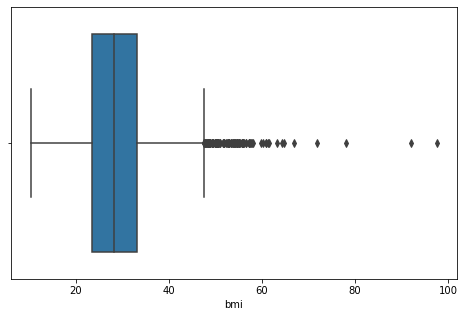

In [10]:
# Checking for outliers in the bmi column
sns.boxplot(df.bmi)

**Since there are outliers present we can’t perform mean imputation as mean is affected by the outliers
Hence we impute it with median values.**

In [210]:
df.bmi = df.bmi.fillna(df.bmi.median())

## Q5. Check the datatype, number of non null values and name of each variable in the dataset

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**From the above output we found out there 3 float value columns,4 int value columns, 5 object value columns and bmi has 201 null values**

# Q6. Check the descriptive statistics of the dataset.

In [98]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Inference :**
1. `id`: column has all unique values and will not be helpful for the prediction.
2. `age`: column is right skewed
3. `hypertension and heartdisease` are categorical column with binary values
4. `avg_glucose_level`: column is right skewed
5. `bmi`:column is right skewed
6. `stroke`: is categorical column with binary values

In [99]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


**Inference :**
1. `gender`: column has 3 unique values and most repeated value is Female 2994 times.
2. `ever_married`: column has 2 unique values and most repeated value is Yes 3353 times.
3. `work_type`: column has 5 unique values and most repeated value is private 2925 times.
4. `Residence_type`:column has 2 unique values and most repeated value is Urban 2596 times.
5. `smoking_status`:column has 4 unique values and most repeated value is never smoked 1892 times.


In [100]:
# for i in df.columns:
#     print(f'{i} :{df[i].unique()}')

# Q7. Visualize the proportion of Stroke samples in the dataset

In [101]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [102]:
px.pie(values=df.stroke.value_counts().values,names = ['storke_no','stroke_yes'],width=400, height=400,
       color_discrete_sequence=px.colors.sequential.RdBu)


**Inference:
There are total `249` i.e `4.9% ` person among 5110 got stroke**

# Q8. Visualize the Distribution of Male and Female Ages. Write the Observation.

In [103]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

## **Treating gender values**

**We have a 'other' gender and since there is only 1 instance we will impute it with `female` highest occuring indtance it as to reduce the dimension of age**

In [211]:
df.gender = df.gender.replace('Other','Female')

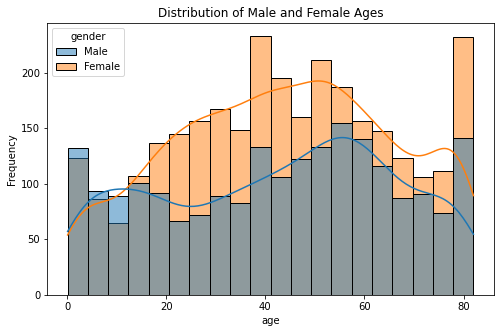

In [105]:
sns.histplot(data=df, x='age', hue='gender',kde=True)
plt.title('Distribution of Male and Female Ages')
plt.ylabel('Frequency')
plt.show()

**Distribution of age for both Male and Female is multimodal**

# Q10.Visualize the stroke sample based on
a) BMI and Glucose Level

b) BMI and Age

In [21]:
# sns.scatterplot(df.bmi,df['avg_glucose_level'],hue=df.stroke)

In [22]:
# sns.scatterplot(df.bmi,df.age,hue=df.stroke)

In [16]:
# a) BMI and Glucose Level
px.scatter(data_frame= df,x = "bmi", y = 'avg_glucose_level',color ="stroke" )


In [17]:
# a) BMI and Age
px.scatter(data_frame= df,x = "bmi", y = 'age',color ="stroke" )

**Inference :
From above plots**
1. BMI index between 20- 50 and avg_glucose_level more than 100 got strokes.
2. BMI index between 15- 50 and age between 40-80  got strokes.


# Q11. Using the pie chart visualizes the proportion of different smoking categories among the stroke population.

In [106]:
df.smoking_status.value_counts().index

Index(['never smoked', 'Unknown', 'formerly smoked', 'smokes'], dtype='object')

In [19]:
df_stroke = df[df.stroke == 1]

px.pie(values=df_stroke.smoking_status.value_counts().values,
       names = ['never smoked', 'Unknown', 'formerly smoked', 'smokes'],
       width=400, 
       height=400,
       color_discrete_sequence=px.colors.sequential.RdBu)

**Inference :
From above plot**
1. 90 observations i.e 36.1% never smoked and got stroke.
2. 47 obseravtions of formerly smoked and 42 observations of smokes got stroke .
3. 70 observations labeled as unknown for theier smoking habits




# Q12. Perform hypothesis testing to find the significant variables.

**Dividing the dataset into categorical and numerical columns and then finding pvalue for each independent feature corresponding to dependent feture(stroke).
Keeping pvalue threshold as 0.05**

**1. Hypothesis Testing for Categorical columns and stroke**

Hypothesis :
    
H0:Independent variables are not significantly associated with the dependent variable (stroke)

H1:Independent variables are significantly associated with the dependent variable (stroke)

if pvalue<0.05 we will reject the null hypothesis.

In [107]:
cat_cols = ['gender','hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type','smoking_status']

In [108]:
# To perform hypothesis between categorical columns we are using chi2_contingency

In [109]:
from scipy.stats import chi2_contingency
pvalue_score = pd.DataFrame(columns=['Feature','pvalue'])


def update_score_categorical(cat_cols):
    
    global pvalue_score
    for col in cat_cols:
        contingency_table = pd.crosstab(df[col], df['stroke'])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        pvalue_score = pvalue_score.append({'Feature':col,'pvalue':p_value}, ignore_index = True)

In [110]:
# list of categorical variables
cat_cols = ['gender','hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type','smoking_status']
update_score_categorical(cat_cols)


**2. Hypothesis Testing for numerical columns and stroke**

Hypothesis :
    
H0:The variables are not correlated with each other

H1:The variables are correlated with each other

if pvalue<0.05 we will reject the null hypothesis.

In [111]:
pvalue_score

,Feature,pvalue
0,gender,5.580285e-01
1,hypertension,1.661622e-19
2,heart_disease,2.088785e-21
3,ever_married,1.638902e-14
4,work_type,5.397708e-10
5,Residence_type,2.983317e-01
6,smoking_status,2.085400e-06


### Q13. Drop the unnecessary columns.

The 'id' column can be dropped since the attribute holds no significant importance to the problem at hand.

In [234]:
df = df.drop(['id'],axis=1)

KeyError: "['id'] not found in axis"

### Q14. Write the code to replace following categories columns in integer format as follow –
1. work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)
2. ever_married('Yes': 1, 'No': 0)
3. smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [113]:
# Dataset before replacing 
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [212]:
# Creating copy of a dataframe for futher use
data =df.copy()

In [213]:
# Using dictionary to map the values
work_type_dict = {'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':-2}
ever_married_dict = {'Yes': 1, 'No': 0}
smoking_status_dict = {'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1}


# using above parameters to map the categorical values to their corresponging integer labels.
df.work_type =df.work_type.map(work_type_dict)
df.ever_married =df.ever_married.map(ever_married_dict)
df.smoking_status =df.smoking_status.map(smoking_status_dict)

df.head()
# Dataset after replacing 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,0,Urban,228.69,36.6,2,1
1,51676,Female,61.0,0,0,1,1,Rural,202.21,28.1,0,1
2,31112,Male,80.0,0,1,1,0,Rural,105.92,32.5,0,1
3,60182,Female,49.0,0,0,1,0,Urban,171.23,34.4,-1,1
4,1665,Female,79.0,1,0,1,1,Rural,174.12,24.0,0,1


In [214]:
# Replacing values of gender and residence_type column 
gender_dict = {'Male':0,'Female':1}
residence_dict = {'Urban':0,'Rural':1}
df.gender =df.gender.map(gender_dict)
df.Residence_type =df.Residence_type.map(residence_dict)

### Q15. Check the distribution of 'bmi' and 'stroke' columns in the dataset.

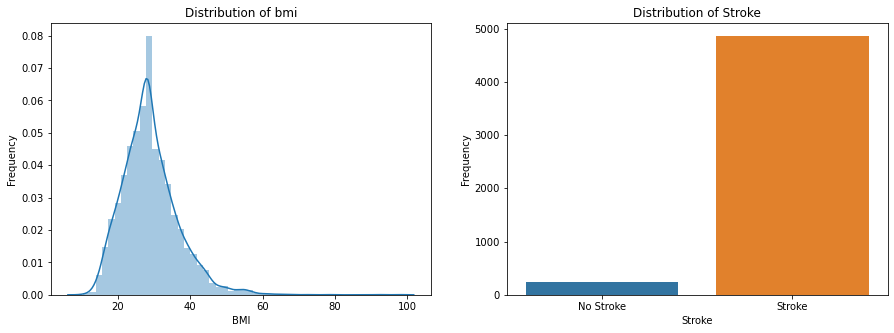

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# plot for BMI
sns.distplot(df['bmi'],kde=True,ax=ax[0])
ax[0].set_xlabel('BMI')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of bmi')

# plot for Stroke
sns.barplot(df['stroke'].unique(), df['stroke'].value_counts(),ax=ax[1])
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['No Stroke', 'Stroke'])
ax[1].set_xlabel('Stroke')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Distribution of Stroke')
plt.show()

### 16. List down columns that are highly skewed.

In [33]:
df.skew().sort_values(ascending=False)

stroke               4.193284
heart_disease        3.947244
hypertension         2.715392
avg_glucose_level    1.572284
bmi                  1.088187
work_type            0.883040
smoking_status       0.082279
Residence_type       0.032107
age                 -0.137059
gender              -0.349749
ever_married        -0.657745
dtype: float64

**Highly skewed columns are considered which are having skewness greater than 1 i.e**
1. stroke,
2. heart_disease,
3. hypertension,
4. avg_glucose_level
5. bmi 

### 17. List down the columns that are highly kurtosis.

In [34]:
df.kurtosis().sort_values(ascending=False)

stroke               15.589736
heart_disease        13.586052
hypertension          5.375456
bmi                   3.635306
avg_glucose_level     1.680479
work_type            -0.501088
smoking_status       -0.922415
age                  -0.991010
ever_married         -1.567985
gender               -1.878411
Residence_type       -1.999752
dtype: float64

**Columns with high kurtosis are considered which are having kurtosis greater than 3 i.e**
1. stroke,
2. heart_disease,
3. hypertension,
4. avg_glucose_level
5. bmi 

### 18. Find the distribution of all variables with respect to the outcome 'stroke' variable.

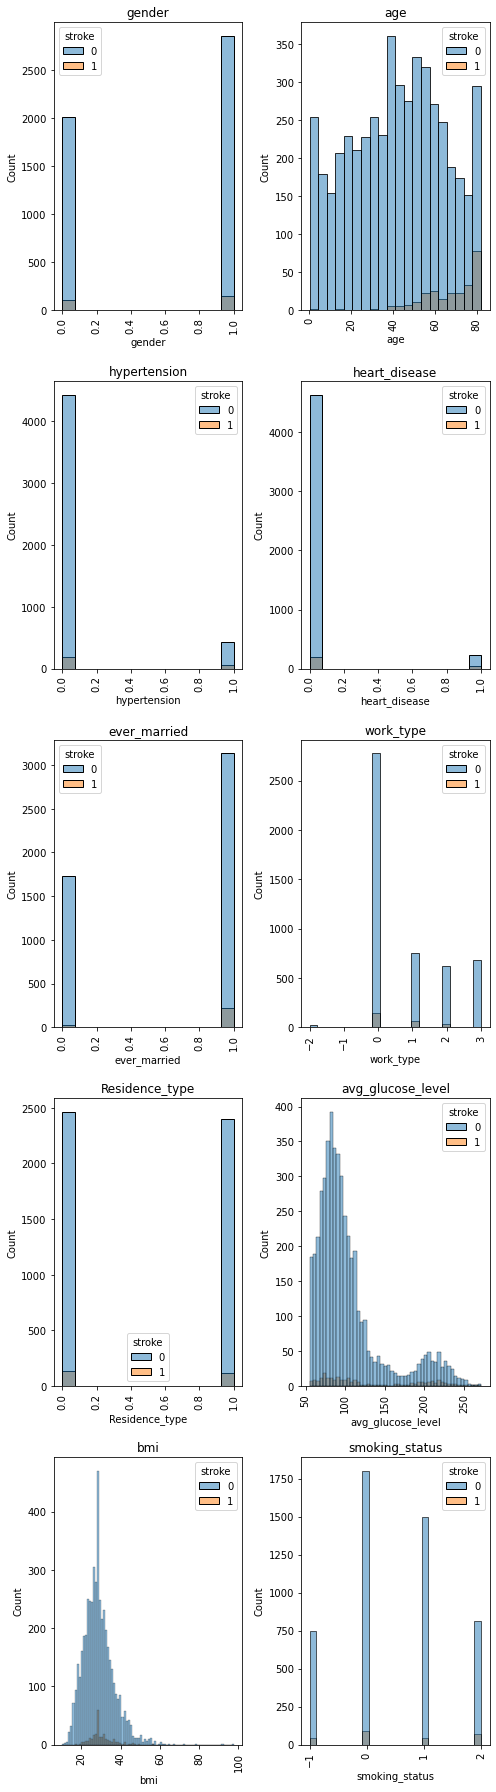

In [40]:
rows=5
columns=2
index=1
plt.figure(figsize=(7,25))
for col in df.columns:
    if col != 'stroke':
        plt.subplot(rows,columns,index)
        sns.histplot(data =df,x =col, hue = df.stroke,alpha=0.5)
        plt.title(col)
        plt.xticks(rotation=90)
        index+=1
plt.tight_layout()
plt.show()

        
        

### 19. Plot the heatmap for correlation matrix for the given dataset. Write the observation. Especially note down columns that are highly correlated (Positive or negative correlation, consider 0.7 to 1 as high)

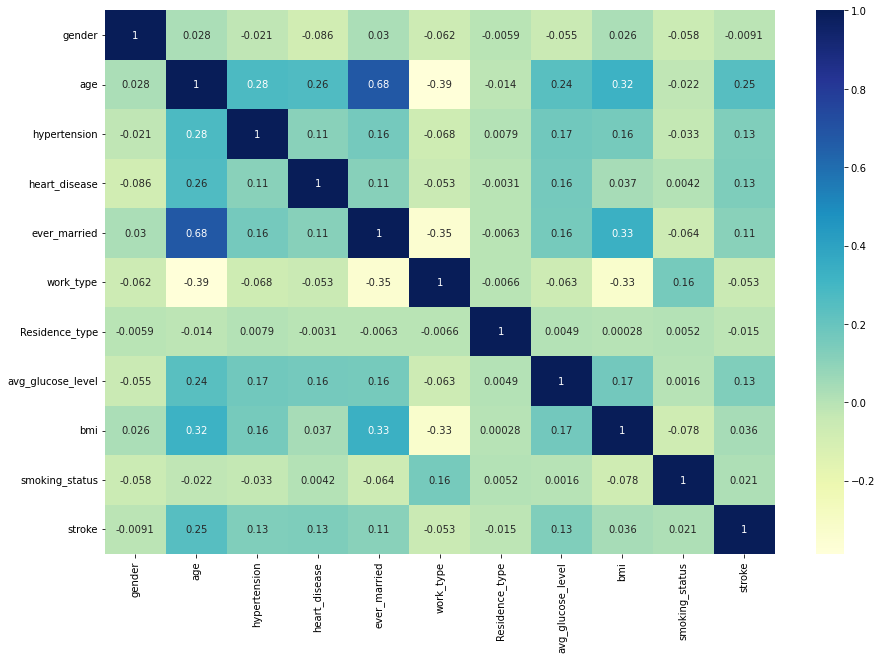

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

1. There is a weak correlation between the attributes as per the plotted heatmap
2. The high positive correlation found was between `age` and `ever_married` = 0.68
3. Rest all correlations were less than 0.4
4. We could not draw any statistical insight from heatmap

## Performing Transformation and Scaling before spliting the data

In [37]:
df.skew().sort_values(ascending=False)  

stroke               4.193284
heart_disease        3.947244
hypertension         2.715392
avg_glucose_level    1.572284
bmi                  1.088187
work_type            0.883040
smoking_status       0.082279
Residence_type       0.032107
age                 -0.137059
gender              -0.349749
ever_married        -0.657745
dtype: float64

**As we can see `hypertension`,`heart_disease`,`avg_glucose_level`,`bmi` are highly skewed we will perform transformation**

In [216]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['hypertension'] = pt.fit_transform(df[['hypertension']])
df['heart_disease'] = pt.fit_transform(df[['heart_disease']])
df['avg_glucose_level'] = pt.fit_transform(df[['avg_glucose_level']])
df['bmi'] = pt.fit_transform(df[['bmi']])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,-0.328602,4.185032,1,0,0,1.862358,1.045386,2,1
1,51676,1,61.0,-0.328602,-0.238947,1,1,1,1.700414,0.026975,0,1
2,31112,0,80.0,-0.328602,4.185032,1,0,1,0.394714,0.587667,0,1
3,60182,1,49.0,-0.328602,-0.238947,1,0,0,1.444941,0.806595,-1,1
4,1665,1,79.0,3.043196,-0.238947,1,1,1,1.472748,-0.580812,0,1


**here we can observe that after tranforming the value will near to normal distribution and it also useful to treat outlier aswell without losing the data**

In [217]:
# And performing scaling for age column
scalar = StandardScaler()
df[['age']] = scalar.fit_transform(df[['age']])

In [218]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,1.051434,-0.328602,4.185032,1,0,0,1.862358,1.045386,2,1
1,51676,1,0.786070,-0.328602,-0.238947,1,1,1,1.700414,0.026975,0,1
2,31112,0,1.626390,-0.328602,4.185032,1,0,1,0.394714,0.587667,0,1
3,60182,1,0.255342,-0.328602,-0.238947,1,0,0,1.444941,0.806595,-1,1
4,1665,1,1.582163,3.043196,-0.238947,1,1,1,1.472748,-0.580812,0,1


Here using transformation we can reduce the skewness of variable and here in our data we can see there are some variable which are skewed also it useful to treat the outlier .

### 20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.

In [219]:
X = df.drop(columns=['stroke'],axis=1)
y= df.stroke
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=10)
X_train.shape

(3577, 11)

In [220]:
X_test.shape

(1533, 11)

In [221]:
# Before building a model we need to split the dataset into train data and test data 

### 21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique.

In [222]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

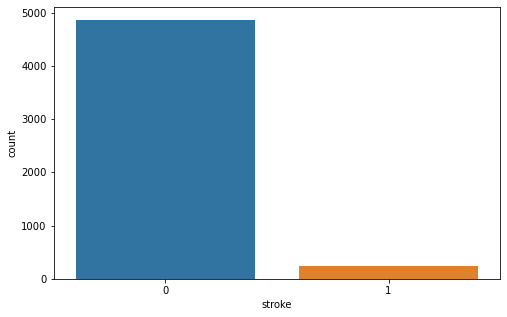

In [223]:
sns.countplot(df.stroke)

In [224]:
# As we see count of stroke values for instance 0 & 1 are imbalanced 

In [225]:
# Using SMOTE (Synthetic Minority Oversampling Technique) technique to oversample the minority class. 
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)


print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_res == 0)))


After OverSampling, counts of label '1': 4861
After OverSampling, counts of label '0': 4861 



**SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to
overcome the overfitting problem posed by random oversampling**

**Now Dataset has been balanced having same values for both instances of values of stroke**

### Q22. Model Selection/hyperparameter tuning
1. Try different models and fine tune their performance until you get the desired level of performance on the given dataset.
2. Model Evaluation
3. Evaluate the models using appropriate evaluation metrics.

In [226]:
X_train,X_test,y_train,y_test =train_test_split(X_res,y_res,test_size=0.3,random_state=42)
X_train.shape

(6805, 11)

**Defining the function for roc_curve, Classification Report,Confusion Matrix**

In [48]:
def get_test_report(model, test_data,y_test):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(test_data)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

In [49]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    
    # create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [50]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model, test_data):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(test_data)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for  Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [51]:
def Model(model):
    model.fit(X_train,y_train)
    score = model.score(X_test, y_test)
    
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)

    print('Testing Score :',model_test_score)
    plot_confusion_matrix(model,X_test)
    print(get_test_report(model,X_test,y_test))
    plot_roc(model, X_test) 

### 1. Logistic Regression

Testing Score : 0.8066506684950291


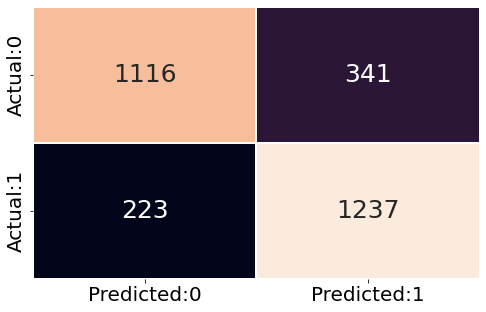

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1457
           1       0.78      0.85      0.81      1460

    accuracy                           0.81      2917
   macro avg       0.81      0.81      0.81      2917
weighted avg       0.81      0.81      0.81      2917



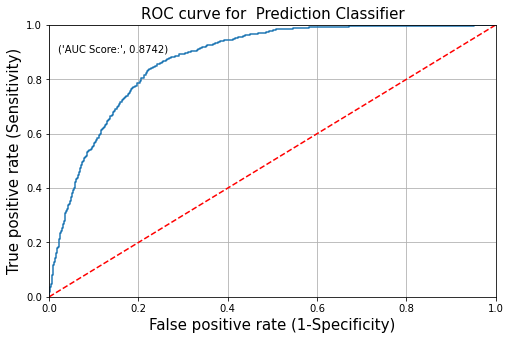

In [52]:
lg_reg=LogisticRegression()
Model(lg_reg)

In [58]:
# here we first start with a base model and we can observe we got 80% accuracy and or model also give good preciosion,recall score aswell

### 2. Decision Tree

Testing Score : 0.8810421666095304


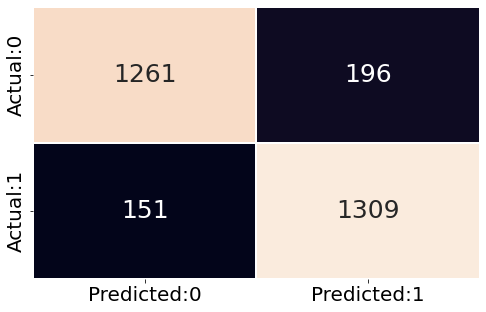

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1457
           1       0.87      0.90      0.88      1460

    accuracy                           0.88      2917
   macro avg       0.88      0.88      0.88      2917
weighted avg       0.88      0.88      0.88      2917



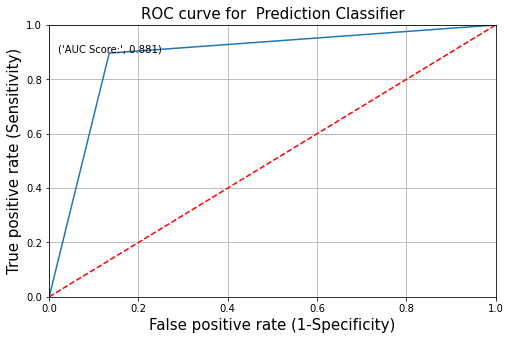

In [59]:
DTC=DecisionTreeClassifier()
Model(DTC)

### 3. Random Forest

Testing Score : 0.9252656839218375


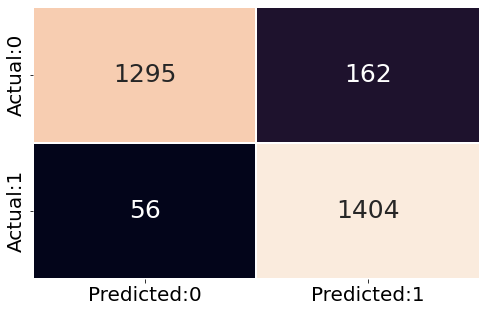

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1457
           1       0.90      0.96      0.93      1460

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



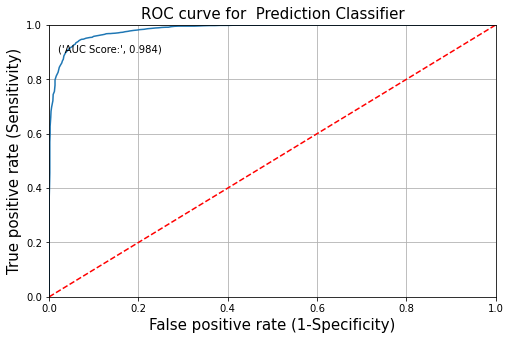

In [60]:
RF=RandomForestClassifier()
Model(RF)

### 4. KNN Model

Testing Score : 0.8796708947548851


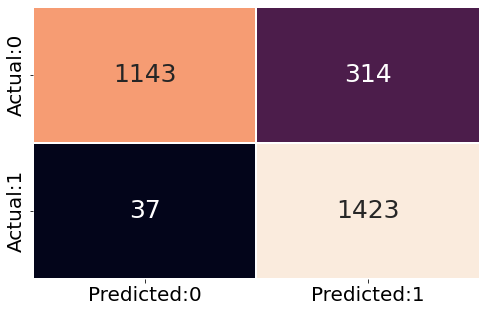

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1457
           1       0.82      0.97      0.89      1460

    accuracy                           0.88      2917
   macro avg       0.89      0.88      0.88      2917
weighted avg       0.89      0.88      0.88      2917



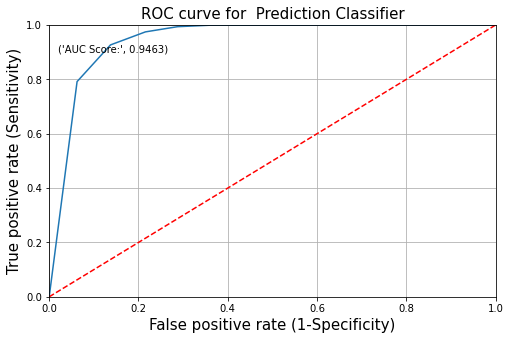

In [61]:
knn=KNeighborsClassifier()
Model(knn)

### 5. Gaussian Naive Bayes

Testing Score : 0.7641412410010284


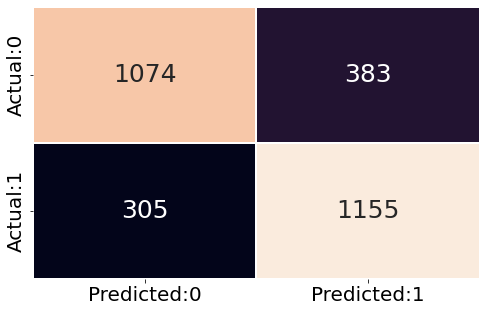

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1457
           1       0.75      0.79      0.77      1460

    accuracy                           0.76      2917
   macro avg       0.76      0.76      0.76      2917
weighted avg       0.76      0.76      0.76      2917



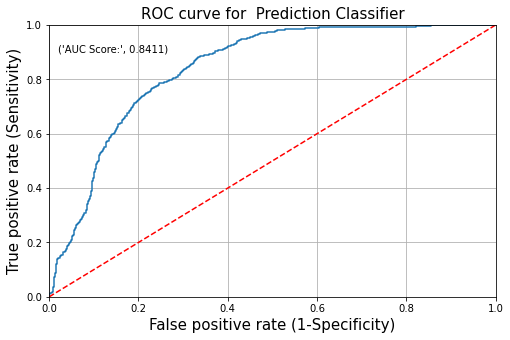

In [62]:
GN=GaussianNB()
Model(GN)

### 6. XGBoost Classifier

Testing Score : 0.9592046623243058


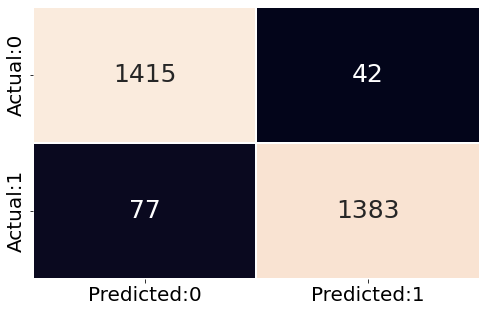

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1457
           1       0.97      0.95      0.96      1460

    accuracy                           0.96      2917
   macro avg       0.96      0.96      0.96      2917
weighted avg       0.96      0.96      0.96      2917



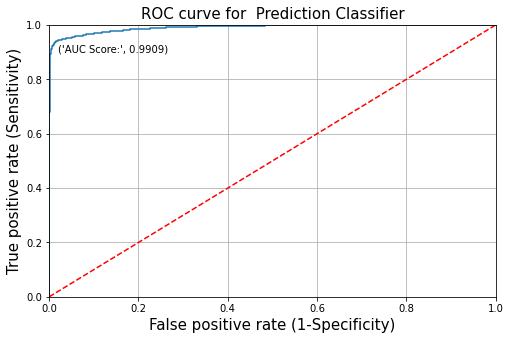

In [63]:
xgb = XGBClassifier()
Model(xgb)

In [64]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

# Training, Testing and evaluating the model with different classifiers at a time

for m in range(len(models)):
    
    lst_2= []
    

    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    
    
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

In [66]:
# Creating the dataframe for all the classifiers with their respective metrics
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy',  'ROC AUC', 'Precision', 'Recall', 'F1'])


df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,ROC AUC,Precision,Recall,F1
5,XGBoost,95.920466,95.517923,0.959217,0.970526,0.947260,0.958752
4,Random Forest,92.423723,92.681783,0.924203,0.897881,0.957534,0.926748
3,Decision Tree,88.207062,89.199361,0.882058,0.872995,0.894521,0.883627
1,KNeighbors,87.967089,87.508789,0.879573,0.819229,0.974658,0.890210
0,Logistic Regreesion,80.287967,80.176514,0.802844,0.783472,0.837671,0.809666
2,GaussianNB,76.414124,77.046385,0.764113,0.750975,0.791096,0.770514


### Performing Hyperparameter Tuning through GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[10]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[10]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[10]}]), 
            (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]


In [247]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 81.91%
Best Parameters :  {'C': 0.25, 'random_state': 10}

----------------

KNeighborsClassifier():
Best Accuracy : 88.10%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 5}

----------------

GaussianNB():
Best Accuracy : 80.31%
Best Parameters :  {'var_smoothing': 1e-09}

----------------

DecisionTreeClassifier():
Best Accuracy : 90.11%
Best Parameters :  {'criterion': 'gini', 'random_state': 10}

----------------

RandomForestClassifier():
Best Accuracy : 93.55%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 200, 'random_state': 10}

----------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constr

**We can see that RandomForest and XGBoost resulted into good accuracy after performing GirdSearchCV**

## Models after Tuning Hyperparameters

Testing Score : 0.9276654096674666


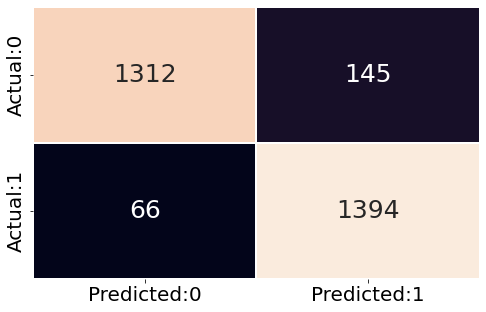

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1457
           1       0.91      0.95      0.93      1460

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



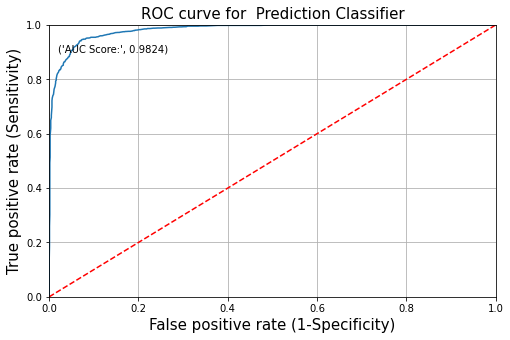

In [129]:
RF=RandomForestClassifier(criterion='entropy',n_estimators= 200, random_state= 10)
Model(RF)

Testing Score : 0.9156667809393212


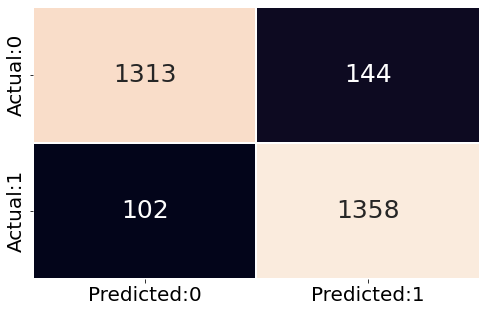

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1457
           1       0.90      0.93      0.92      1460

    accuracy                           0.92      2917
   macro avg       0.92      0.92      0.92      2917
weighted avg       0.92      0.92      0.92      2917



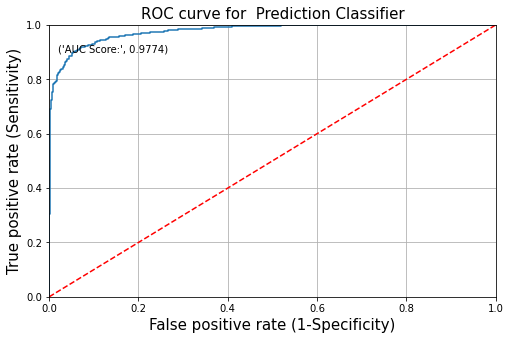

In [130]:
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
Model(xgb)

**Conclusion: After performing different models with hyper parameter tuning we found out that RandomForest is peforming best among all.**

# UNSUPERVISED LEARNING

In [258]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,labels
0,9046,0,67.0,0,1,1,0,0,228.69,36.6,2,1,2
1,51676,1,61.0,0,0,1,1,1,202.21,28.1,0,1,0
2,31112,0,80.0,0,1,1,0,1,105.92,32.5,0,1,2
3,60182,1,49.0,0,0,1,0,0,171.23,34.4,-1,1,0
4,1665,1,79.0,1,0,1,1,1,174.12,24.0,0,1,1


In [259]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1.051434,-0.328602,4.185032,1,0,0,1.862358,1.045386,2,1
1,1,0.786070,-0.328602,-0.238947,1,1,1,1.700414,0.026975,0,1
2,0,1.626390,-0.328602,4.185032,1,0,1,0.394714,0.587667,0,1
3,1,0.255342,-0.328602,-0.238947,1,0,0,1.444941,0.806595,-1,1
4,1,1.582163,3.043196,-0.238947,1,1,1,1.472748,-0.580812,0,1


In [260]:
from sklearn.cluster import AgglomerativeClustering 

In [261]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [262]:
model.fit(df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [263]:
data['labels'] = model.labels_

data.groupby(["labels"]).count()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
labels,,,,,,,,,,,,
0,276,276,276,276,276,276,276,276,276,276,276,276
1,4,4,4,4,4,4,4,4,4,4,4,4
2,4830,4830,4830,4830,4830,4830,4830,4830,4830,4830,4830,4830


In [264]:
df_clusters = data.groupby(['labels'])

In [265]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [266]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df, 'average')
c, coph_dists = cophenet(Z , pdist(df))

c

0.8407667405412987

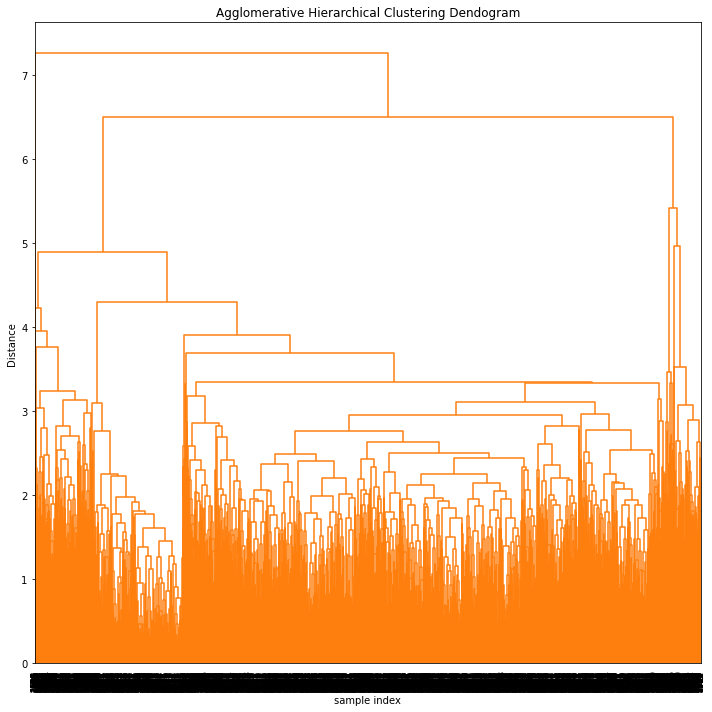

In [62]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [268]:
Z = linkage(df, 'ward')
c, coph_dists = cophenet(Z , pdist(df))

c

0.7229183085395414

In [269]:
data.labels.value_counts()

2    4830
0     276
1       4
Name: labels, dtype: int64

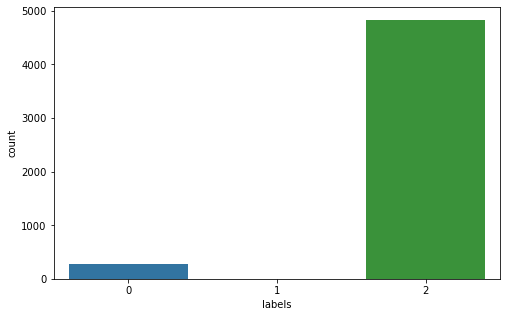

In [270]:
sns.countplot(data.labels)
plt.show()

#  first 5 observations for 1st cluster and its summary

In [271]:
data[data.labels==0].head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,labels
0,9046,0,67.0,0,1,1,0,0,228.69,36.6,2,1,0
2,31112,0,80.0,0,1,1,0,1,105.92,32.5,0,1,0
6,53882,0,74.0,1,1,1,0,1,70.09,27.4,0,1,0
11,12095,1,61.0,0,1,1,2,1,120.46,36.8,-1,1,0
13,8213,0,78.0,0,1,1,0,0,219.84,28.1,1,1,0


In [272]:
data[data.labels==0].describe().T

,count,mean,std,min,25%,50%,75%,max
id,276.0,36403.068841,21421.764865,239.00,16580.00,37794.000,54502.5000,72715.00
gender,276.0,0.409420,0.492620,0.00,0.00,0.000,1.0000,1.00
age,276.0,68.188406,11.613504,2.00,61.00,71.000,78.0000,82.00
hypertension,276.0,0.231884,0.422802,0.00,0.00,0.000,0.0000,1.00
heart_disease,276.0,1.000000,0.000000,1.00,1.00,1.000,1.0000,1.00
ever_married,276.0,0.884058,0.320737,0.00,1.00,1.000,1.0000,1.00
work_type,276.0,0.565217,0.728201,0.00,0.00,0.000,1.0000,3.00
Residence_type,276.0,0.485507,0.500698,0.00,0.00,0.000,1.0000,1.00
avg_glucose_level,276.0,136.818768,62.823103,56.31,83.43,106.545,201.8725,271.74
bmi,276.0,30.051449,5.014680,19.10,27.30,28.950,32.5000,54.70


Interpretation: The above summary shows that the average age of the person in this cluster is 68 and maximum age is 82. Approximately most of are female.

Here the spending score is high along with the high income.

# first 5 observations for 2nd cluster and its summary

In [232]:
data[data.labels==0].head(5)

,age,avg_glucose_level,bmi,labels
261,37.0,162.96,39.4,0
272,71.0,198.21,27.3,0
277,54.0,206.72,26.7,0
278,70.0,214.45,31.2,0
283,58.0,149.75,27.0,0


In [255]:
data[data.labels==1].describe().T

,count,mean,std,min,25%,50%,75%,max
id,430.0,36078.841860,21391.587440,365.00,17229.2500,34720.000,55801.2500,72918.0
gender,430.0,0.569767,0.495685,0.00,0.0000,1.000,1.0000,1.0
age,430.0,61.337209,13.826776,19.00,52.0000,62.000,73.0000,82.0
hypertension,430.0,1.000000,0.000000,1.00,1.0000,1.000,1.0000,1.0
heart_disease,430.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.0
ever_married,430.0,0.904651,0.294038,0.00,1.0000,1.000,1.0000,1.0
work_type,430.0,0.593023,0.731858,0.00,0.0000,0.000,1.0000,2.0
Residence_type,430.0,0.500000,0.500582,0.00,0.0000,0.500,1.0000,1.0
avg_glucose_level,430.0,127.646209,58.458474,55.78,80.7875,102.535,186.8125,267.6
bmi,430.0,32.340465,7.259958,15.00,28.1000,30.900,36.0750,60.9


# first 5 observations for 3rd cluster and its summary

In [256]:
data[data.labels==2].head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,labels
0,9046,0,67.0,0,1,1,0,0,228.69,36.6,2,1,2
2,31112,0,80.0,0,1,1,0,1,105.92,32.5,0,1,2
11,12095,1,61.0,0,1,1,2,1,120.46,36.8,-1,1,2
13,8213,0,78.0,0,1,1,0,0,219.84,28.1,1,1,2
14,5317,1,79.0,0,1,1,0,0,214.09,28.2,0,1,2


In [257]:
data[data.labels==2].describe().T

,count,mean,std,min,25%,50%,75%,max
id,211.0,34828.042654,21548.490981,967.00,15102.500,33560.00,53749.50,72715.0
gender,211.0,0.398104,0.490671,0.00,0.000,0.00,1.00,1.0
age,211.0,67.777251,11.189819,28.00,60.000,70.00,78.00,82.0
hypertension,211.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.0
heart_disease,211.0,1.000000,0.000000,1.00,1.000,1.00,1.00,1.0
ever_married,211.0,0.895735,0.306331,0.00,1.000,1.00,1.00,1.0
work_type,211.0,0.559242,0.703764,0.00,0.000,0.00,1.00,2.0
Residence_type,211.0,0.478673,0.500733,0.00,0.000,0.00,1.00,1.0
avg_glucose_level,211.0,132.804929,60.514022,56.31,83.385,103.06,197.25,254.6
bmi,211.0,29.744550,4.811554,19.10,27.050,28.60,32.30,54.7
